In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
% matplotlib inline 

In [2]:
nyc_location_file = 'nyc-rolling-sales.csv'
df = pd.read_csv (nyc_location_file,
                  na_values = [' -  '],
                  encoding = 'ISO-8859-1')

In [3]:
# Give heading to the unnamed column
df.rename (columns = {'Unnamed: 0' : 'ID'}, inplace = True)

In [4]:
# Replace spaces in column heading names by "_"
df.columns = ['ID', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
              'BLOCK', 'LOT', 'EASEMENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 
              'ZIPCODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
              'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 
              'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
print ("----------------------------------------------------------------------------------------------------")
print ("-->No. of rows in the dataset:", len (df))
print ("----------------------------------------------------------------------------------------------------")
df.head ()

----------------------------------------------------------------------------------------------------
-->No. of rows in the dataset: 84548
----------------------------------------------------------------------------------------------------


,ID,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASEMENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5]), <a list of 13 Text xticklabel objects>)

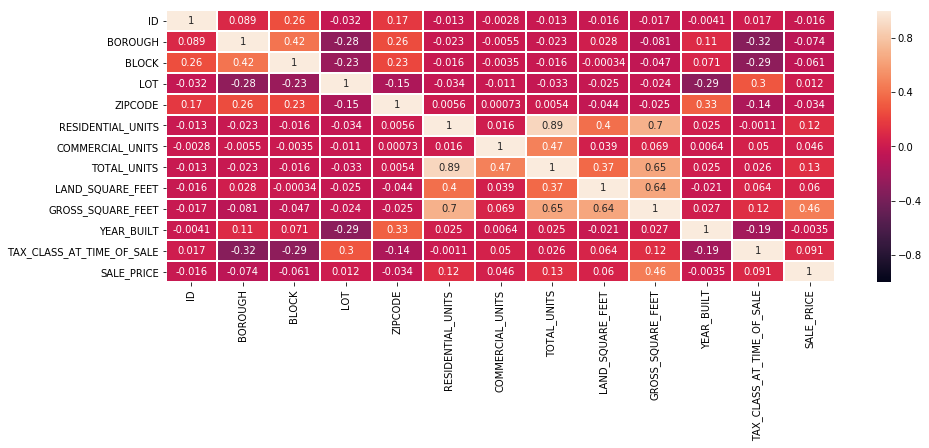

In [5]:
heatmap_df = df.corr ()
plt.subplots (figsize = (15, 5))
#plt.figure (figsize = (15, 5))
sns.heatmap (heatmap_df,
             vmin = -1, 
             annot = True,
             linewidths = 1)
plt.xticks (rotation = 90)

In [6]:
# Drop the rows in SALE_PRICE, LAND_SQUARE_FEET, GROSS_SQUARE_FEET columns
df_no_na = df.dropna (subset = ['SALE_PRICE',
                                'LAND_SQUARE_FEET',
                                'GROSS_SQUARE_FEET'])
df_no_na.to_csv ('nyc_rolling_sales_updated_no_na.csv')

print ("-->No. of rows in the dataset after dropping null values in SALE_PRICE, LAND_SQUARE_FEET, \
GROSS_SQUARE_FEET columns:", len (df_no_na))


-->No. of rows in the dataset after dropping null values in SALE_PRICE, LAND_SQUARE_FEET, GROSS_SQUARE_FEET columns: 48244


In [7]:
# Let us see the correlation after dropping null rows in SALE_PRICE, LAND_SQUARE_FEET, GROSS_SQUARE_FEET columns
df_no_na.corr ()

,ID,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
ID,1.000000,0.107307,0.264704,0.051931,0.166647,-0.021241,-0.000592,-0.017938,-0.012308,-0.021667,-0.024363,0.043825,-0.010016
BOROUGH,0.107307,1.000000,0.201344,-0.168136,0.095147,-0.073682,-0.006478,-0.065755,0.020578,-0.074989,0.149763,-0.269283,-0.068443
BLOCK,0.264704,0.201344,1.000000,-0.136833,0.145247,-0.042517,-0.004499,-0.038343,0.003051,-0.048314,0.082485,-0.207498,-0.051458
LOT,0.051931,-0.168136,-0.136833,1.000000,-0.070124,-0.034764,-0.008621,-0.031990,-0.035257,-0.044370,-0.393575,0.291977,-0.014425
ZIPCODE,0.166647,0.095147,0.145247,-0.070124,1.000000,-0.010986,0.000048,-0.008999,-0.012929,-0.019318,0.311015,-0.096384,-0.020319
RESIDENTIAL_UNITS,-0.021241,-0.073682,-0.042517,-0.034764,-0.010986,1.000000,0.012775,0.848305,0.401047,0.618418,0.027207,0.023702,0.122697
COMMERCIAL_UNITS,-0.000592,-0.006478,-0.004499,-0.008621,0.000048,0.012775,1.000000,0.540251,0.052872,0.069502,0.005444,0.053403,0.047220
TOTAL_UNITS,-0.017938,-0.065755,-0.038343,-0.031990,-0.008999,0.848305,0.540251,1.000000,0.365453,0.557201,0.025181,0.051038,0.128211
LAND_SQUARE_FEET,-0.012308,0.020578,0.003051,-0.035257,-0.012929,0.401047,0.052872,0.365453,1.000000,0.591357,0.009512,0.063370,0.041628
GROSS_SQUARE_FEET,-0.021667,-0.074989,-0.048314,-0.044370,-0.019318,0.618418,0.069502,0.557201,0.591357,1.000000,0.031403,0.121057,0.455339


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5]), <a list of 13 Text xticklabel objects>)

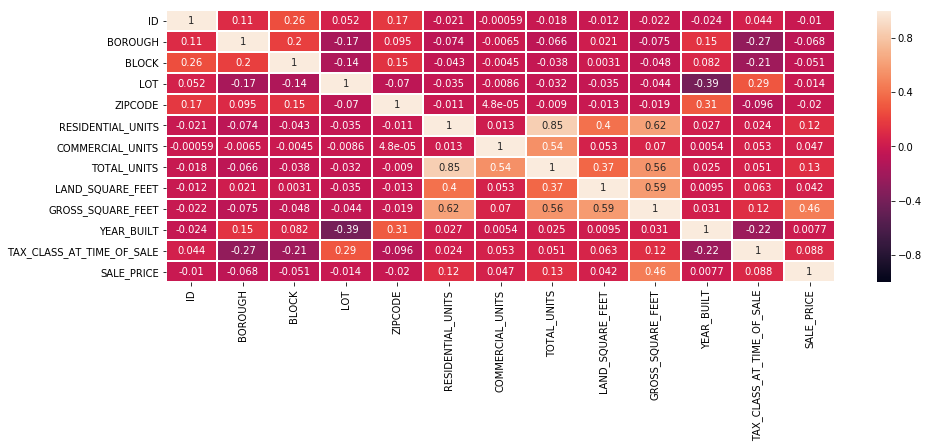

In [8]:
# Let us plot the correlation after dropping null rows in SALE_PRICE, LAND_SQUARE_FEET, GROSS_SQUARE_FEET columns
heatmap_df = df_no_na.corr ()
plt.subplots (figsize = (15, 5))
#plt.figure (figsize = (15, 5))
sns.heatmap (heatmap_df,
             vmin = -1, 
             annot = True,
             linewidths = 1)
plt.xticks (rotation = 90)

In [9]:
# Perform regression on SALE_PRICE and GROSS_SQUARE_FEET (without intercept) on clean data
result = smf.ols ('SALE_PRICE ~ GROSS_SQUARE_FEET - 1', 
                  data = df_no_na).fit ()
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 1.300e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:31:13   Log-Likelihood:            -8.5460e+05
No. Observations:               48244   AIC:                         1.709e+06
Df Residuals:                   48243   BIC:                         1.709e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GROSS_SQUARE_FEET   208.6651      1.830    114.034      0.000     205.079     212.252
==============================================================================
Omnibus:                   180795.174   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     368202244272.102
Skew:                          82.954   Prob(JB):                         0.00
Kurtosis:                   13536.015   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

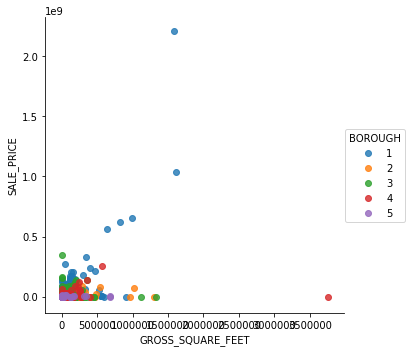

In [10]:
# Let us also do an XY plot to see how these values and the regression line (which may be different from 
# what old produces) look like. The BOROUGH value is used to color the points.
sns.lmplot(x = 'GROSS_SQUARE_FEET', 
           y = 'SALE_PRICE', 
           data = df_no_na, 
           fit_reg = False, #do not show regression line
           hue = 'BOROUGH')   # color by quadrant

In [13]:
# 0 values in GROSS_SQUARE_FEET and SALE_PRICE columns do not make sense - drop those.
df_no_na = df_no_na.drop (df_no_na [df_no_na ['GROSS_SQUARE_FEET'] == 0].index)
df_no_na = df_no_na.drop (df_no_na [df_no_na ['SALE_PRICE'] == 0].index)

# drop those entries where SALE_PRICE < 10000, since these are very likely transfers.
df_no_na = df_no_na.drop (df_no_na [df_no_na ['SALE_PRICE'] < 10000].index)


print ("-->No. of rows left after dropping entries with SALE_PRICE < 10K and GROSS_SQUARE_FEET = 0:",
       len (df_no_na))


-->No. of rows left after dropping entries with SALE_PRICE < 10K and GROSS_SQUARE_FEET = 0: 28432


In [16]:
# Use the standard deviation method to remove the outliers to see if we get still better correlation.
mean_sale_price = df_no_na ['SALE_PRICE'].mean()
std_sale_price = df_no_na ['SALE_PRICE'].std ()
toprange = mean_sale_price + (std_sale_price * 1.96)
botrange = mean_sale_price - (std_sale_price * 1.96)

df_no_na_std = df_no_na.copy () #to not mess up the original df
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['SALE_PRICE'] > toprange].index)
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['SALE_PRICE'] < botrange].index)

#df_no_na_std.head ()
print ("No. of rows left after removing outliers using standard deviation", len(df_no_na_std))

No. of rows left after removing outliers using standard deviation 28313


In [17]:
df_no_na_std.corr ()

,ID,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
ID,1.000000,0.057444,0.424687,-0.026357,0.508925,-0.014519,0.001086,-0.010403,-0.008270,-0.013353,-0.111999,-0.015872,-0.020814
BOROUGH,0.057444,1.000000,0.155777,0.021381,0.064677,-0.100141,-0.004013,-0.079185,0.013638,-0.085075,0.220558,-0.218754,-0.290497
BLOCK,0.424687,0.155777,1.000000,0.039447,0.463610,-0.055211,-0.002182,-0.043648,-0.001476,-0.050193,0.047832,-0.166965,-0.208336
LOT,-0.026357,0.021381,0.039447,1.000000,-0.083632,-0.008376,-0.003436,-0.008599,0.006205,-0.003162,0.068738,-0.035351,-0.026901
ZIPCODE,0.508925,0.064677,0.463610,-0.083632,1.000000,-0.050835,0.002095,-0.037557,-0.020328,-0.055625,-0.159018,-0.086151,-0.122583
RESIDENTIAL_UNITS,-0.014519,-0.100141,-0.055211,-0.008376,-0.050835,1.000000,0.007315,0.770136,0.492193,0.829688,-0.006048,0.072605,0.208282
COMMERCIAL_UNITS,0.001086,-0.004013,-0.002182,-0.003436,0.002095,0.007315,1.000000,0.643488,0.053255,0.054240,-0.000651,0.067980,0.048408
TOTAL_UNITS,-0.010403,-0.079185,-0.043648,-0.008599,-0.037557,0.770136,0.643488,1.000000,0.410739,0.669711,-0.005045,0.098765,0.190285
LAND_SQUARE_FEET,-0.008270,0.013638,-0.001476,0.006205,-0.020328,0.492193,0.053255,0.410739,1.000000,0.767841,0.017822,0.094451,0.053254
GROSS_SQUARE_FEET,-0.013353,-0.085075,-0.050193,-0.003162,-0.055625,0.829688,0.054240,0.669711,0.767841,1.000000,0.019215,0.164232,0.178449


(array([ -500000.,        0.,   500000.,  1000000.,  1500000.,  2000000.,
         2500000.,  3000000.,  3500000.,  4000000.]),
 <a list of 10 Text xticklabel objects>)

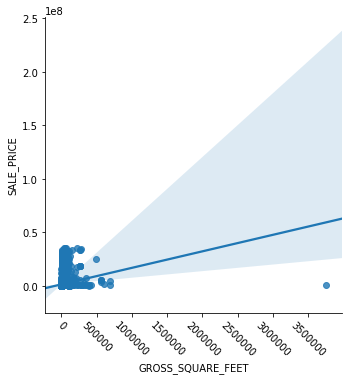

In [18]:
sns.lmplot(x = 'GROSS_SQUARE_FEET', 
           y = 'SALE_PRICE',
           data = df_no_na_std)
plt.xticks (rotation = -45)

In [19]:
result = smf.ols ('SALE_PRICE ~ GROSS_SQUARE_FEET - 1', 
                  data = df_no_na_std).fit ()
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          6.29e-306
Time:                        11:35:51   Log-Likelihood:            -4.5815e+05
No. Observations:               28313   AIC:                         9.163e+05
Df Residuals:                   28312   BIC:                         9.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GROSS_SQUARE_FEET    20.9177      0.553     37.854      0.000      19.835      22.001
==============================================================================
Omnibus:                    32158.038   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13549923.844
Skew:                           5.359   Prob(JB):                         0.00
Kurtosis:                     109.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
result = smf.ols ('SALE_PRICE ~ TOTAL_UNITS - 1', 
                  data = df_no_na_std).fit ()
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1581.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:36:14   Log-Likelihood:            -4.5808e+05
No. Observations:               28313   AIC:                         9.162e+05
Df Residuals:                   28312   BIC:                         9.162e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TOTAL_UNITS  2.737e+04    688.408     39.762      0.000     2.6e+04    2.87e+04
==============================================================================
Omnibus:                    32475.497   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9253381.293
Skew:                           5.615   Prob(JB):                         0.00
Kurtosis:                      90.850   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df_no_na_std.corr ()

,ID,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
ID,1.000000,0.057444,0.424687,-0.026357,0.508925,-0.014519,0.001086,-0.010403,-0.008270,-0.013353,-0.111999,-0.015872,-0.020814
BOROUGH,0.057444,1.000000,0.155777,0.021381,0.064677,-0.100141,-0.004013,-0.079185,0.013638,-0.085075,0.220558,-0.218754,-0.290497
BLOCK,0.424687,0.155777,1.000000,0.039447,0.463610,-0.055211,-0.002182,-0.043648,-0.001476,-0.050193,0.047832,-0.166965,-0.208336
LOT,-0.026357,0.021381,0.039447,1.000000,-0.083632,-0.008376,-0.003436,-0.008599,0.006205,-0.003162,0.068738,-0.035351,-0.026901
ZIPCODE,0.508925,0.064677,0.463610,-0.083632,1.000000,-0.050835,0.002095,-0.037557,-0.020328,-0.055625,-0.159018,-0.086151,-0.122583
RESIDENTIAL_UNITS,-0.014519,-0.100141,-0.055211,-0.008376,-0.050835,1.000000,0.007315,0.770136,0.492193,0.829688,-0.006048,0.072605,0.208282
COMMERCIAL_UNITS,0.001086,-0.004013,-0.002182,-0.003436,0.002095,0.007315,1.000000,0.643488,0.053255,0.054240,-0.000651,0.067980,0.048408
TOTAL_UNITS,-0.010403,-0.079185,-0.043648,-0.008599,-0.037557,0.770136,0.643488,1.000000,0.410739,0.669711,-0.005045,0.098765,0.190285
LAND_SQUARE_FEET,-0.008270,0.013638,-0.001476,0.006205,-0.020328,0.492193,0.053255,0.410739,1.000000,0.767841,0.017822,0.094451,0.053254
GROSS_SQUARE_FEET,-0.013353,-0.085075,-0.050193,-0.003162,-0.055625,0.829688,0.054240,0.669711,0.767841,1.000000,0.019215,0.164232,0.178449


In [24]:
result = smf.ols ('TOTAL_UNITS ~ GROSS_SQUARE_FEET - 1', 
                  data = df_no_na_std).fit ()
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_UNITS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 2.383e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:10:02   Log-Likelihood:            -1.1931e+05
No. Observations:               28313   AIC:                         2.386e+05
Df Residuals:                   28312   BIC:                         2.386e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GROSS_SQUARE_FEET     0.0005   3.51e-06    154.367      0.000       0.001       0.001
==============================================================================
Omnibus:                   111059.826   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     199116898542.339
Skew:                          95.887   Prob(JB):                         0.00
Kurtosis:                   12993.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['GROSS_SQUARE_FEET'] > 400000].index)
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['SALE_PRICE'] > 40000000].index)
print ("No. of rows left after removing more outliers:", len (df_no_na_std))

No. of rows left after removing more outliers: 28303


(array([ -50000.,       0.,   50000.,  100000.,  150000.,  200000.,
         250000.,  300000.,  350000.,  400000.,  450000.]),
 <a list of 11 Text xticklabel objects>)

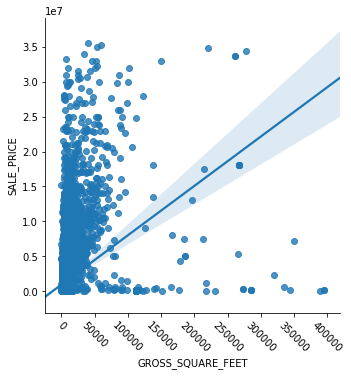

In [26]:
sns.lmplot(x = 'GROSS_SQUARE_FEET', 
           y = 'SALE_PRICE',
           data = df_no_na_std)
plt.xticks (rotation = -45)

In [27]:
df_no_na_std.corr ()

,ID,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
ID,1.000000,0.057357,0.424685,-0.026344,0.509004,-0.022553,0.001538,-0.011579,-0.010463,-0.025195,-0.111947,-0.015376,-0.020253
BOROUGH,0.057357,1.000000,0.155375,0.021140,0.063827,-0.150115,-0.004776,-0.089506,0.013686,-0.172722,0.220862,-0.218555,-0.290326
BLOCK,0.424685,0.155375,1.000000,0.039451,0.463357,-0.089822,-0.001593,-0.052534,-0.001518,-0.104699,0.047967,-0.166529,-0.208429
LOT,-0.026344,0.021140,0.039451,1.000000,-0.083713,-0.008234,-0.003994,-0.007967,0.008097,-0.002386,0.068731,-0.035507,-0.026845
ZIPCODE,0.509004,0.063827,0.463357,-0.083713,1.000000,-0.068554,0.003091,-0.036542,-0.023417,-0.098915,-0.158875,-0.085107,-0.122102
RESIDENTIAL_UNITS,-0.022553,-0.150115,-0.089822,-0.008234,-0.068554,1.000000,0.001922,0.571962,0.103390,0.705453,-0.019278,0.106279,0.350027
COMMERCIAL_UNITS,0.001538,-0.004776,-0.001593,-0.003994,0.003091,0.001922,1.000000,0.821367,0.025788,0.065583,-0.001225,0.065338,0.048253
TOTAL_UNITS,-0.011579,-0.089506,-0.052534,-0.007967,-0.036542,0.571962,0.821367,1.000000,0.080130,0.456195,-0.012002,0.113990,0.239205
LAND_SQUARE_FEET,-0.010463,0.013686,-0.001518,0.008097,-0.023417,0.103390,0.025788,0.080130,1.000000,0.464398,0.019668,0.120109,0.081824
GROSS_SQUARE_FEET,-0.025195,-0.172722,-0.104699,-0.002386,-0.098915,0.705453,0.065583,0.456195,0.464398,1.000000,0.028805,0.313460,0.372228


In [28]:
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['GROSS_SQUARE_FEET'] > 4500].index)
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['SALE_PRICE'] > 2000000].index)
df_no_na_std = df_no_na_std.drop (df_no_na_std [df_no_na_std ['SALE_PRICE'] < 100000].index)
print ("No. of rows left after removing more outliers:", len (df_no_na_std))

No. of rows left after removing more outliers: 24703


In [29]:
result = smf.ols ('SALE_PRICE ~ GROSS_SQUARE_FEET - 1', 
                  data = df_no_na_std).fit ()
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 1.038e+05
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:25:49   Log-Likelihood:            -3.4917e+05
No. Observations:               24703   AIC:                         6.983e+05
Df Residuals:                   24702   BIC:                         6.984e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GROSS_SQUARE_FEET   333.2021      1.034    322.230      0.000     331.175     335.229
==============================================================================
Omnibus:                     1046.847   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2070.857
Skew:                           0.313   Prob(JB):                         0.00
Kurtosis:                       4.273   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text xticklabel objects>)

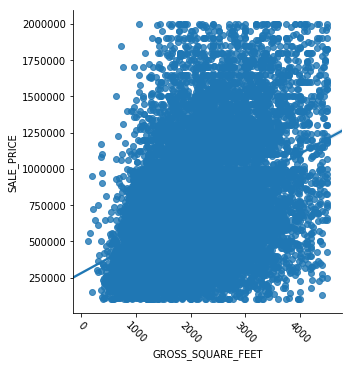

In [30]:
sns.lmplot(x = 'GROSS_SQUARE_FEET', 
           y = 'SALE_PRICE',
           data = df_no_na_std)
plt.xticks (rotation = -45)

(array([ -500000.,        0.,   500000.,  1000000.,  1500000.,  2000000.,
         2500000.]), <a list of 7 Text xticklabel objects>)

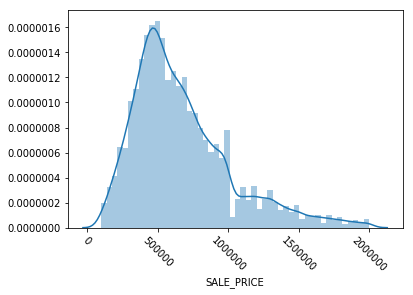

In [31]:
sns.distplot (df_no_na_std ['SALE_PRICE'])
plt.xticks (rotation = -45)

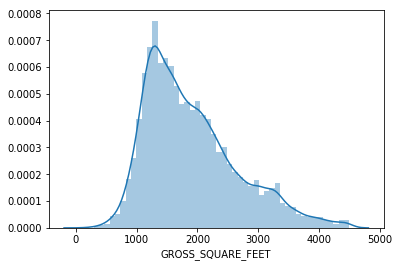

In [32]:
sns.distplot (df_no_na_std ['GROSS_SQUARE_FEET'])